# Analysis of the progress of the COVID-19 and prediction of its behavior

#### The aim of this study is to understand the behavior of covid 19 advance in Brazil, analyzing its trend, seasonality, possible impact of underreporting, among other effects.
##### autor: Lucas Oliveira

### 0 - installing packages that will be used

In [1]:
## We will use seaborn in the 0.11.1 version in this code.
#!pip install seaborn==0.11.1

### 1 - importing the libraries

In [48]:
#The Libraries that we will work with
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from datetime import date

import warnings
warnings.simplefilter("ignore")


### 2 - loading the Data Base

In [3]:
#Local of the file:
filelocation = r'C:\Users\55119\Documents\Lucas - Minhas Pastas\Alura\Covid19 - Time Series\covid19databasebrazil.csv'

In [4]:
#loading and analysing the data set inicial parameters:
data = pd.read_csv(filelocation)
print('______________Data set head is:___________')
print(data.head(2))
print('______________The number of col, and lines in the data set is:',data.shape)
print('______________the numeber of null values in the data is:',data.isna().sum().sum())
print('______________Data Type in the data set__________')
print(data.dtypes)

______________Data set head is:___________
   semana        data    pais estado cidade  novosObitos  Obitos  novosCasos  \
0       9  2020-02-25  Brazil     SP  TOTAL            0       0           1   
1       9  2020-02-25  Brazil  TOTAL  TOTAL            0       0           1   

   Casos  obitosMS  casosMS  obitos_por_100k  casos_por_100k  \
0      1         0        0              0.0         0.00218   
1      1         0        0              0.0         0.00048   

   obitos_por_casos  recuperados  suspeitos  testes  testes_por_100k  
0               0.0          NaN        NaN     NaN              NaN  
1               0.0          NaN        NaN     NaN              NaN  
______________The number of col, and lines in the data set is: (3962, 18)
______________the numeber of null values in the data is: 4209
______________Data Type in the data set__________
semana                int64
data                 object
pais                 object
estado               object
cidade      

#### 2.1 Ajusting our data frame

In [5]:
# In view of the preliminary analysis of the data, it will be necessary to make the following conversions in the data set

# 1) Converting the date time from object to date time
data.data = pd.to_datetime(data.data)

# 2) Give better names for the coloumns
covidcases_filtered = data.rename(columns = {'semana': 'weeknumber', 
                                             'data': 'date',
                                             'estado': 'state',
                                             'cidade': 'city',
                                             'pais':'country',
                                             'novosObitos':'newdeaths',
                                             'Obitos':'deaths',
                                             'novosCasos':'newcases',
                                             'Casos':'cases',
                                             'obitosMS':'deathsMS',
                                             'casosMS':'casesMS',
                                             'obitos_por_100k':'deaths_by_100k',
                                             'casos_por_100k':'cases_by_100k',
                                             'obitos_por_casos':'deaths_by_cases',
                                             'recuperados':'recovered',
                                             'suspeitos':'suspected cases',
                                             'testes':'tests',
                                             'testes_por_100k':'tests_by_100k',                            
                                            }, inplace = False)


# 3) filtering the "Total" in the state columns
covidcases_filtered = covidcases_filtered[covidcases_filtered.state != 'TOTAL']

# The new framework ajusted:
covidcases_filtered.head()


,weeknumber,date,country,state,city,newdeaths,deaths,newcases,cases,deathsMS,casesMS,deaths_by_100k,cases_by_100k,deaths_by_cases,recovered,suspected cases,tests,tests_by_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


### 3 - Graphically exploring death data

#### 3.1 Creating the plot routines for easier plot in the future


In [6]:
# ___________________Creating a routine to plot grphs:____________________
def plottimeseries(title, xlabel, ylabel, x, y, data, hue):
    #Setting colors
    #sns.set_palette('Accent')
    sns.set_style("whitegrid")

    #Setingaa the data used in the graph
    ax = sns.lineplot(x=x,y=y,data=data,hue = hue)

    #Set the Size
    ax.figure.set_size_inches(12,8)

    #Set the title and labels
    ax.set_title(title , loc='left',fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14) 
    ax.set_ylabel(ylabel, fontsize=14) 

    #cleaning the graph
    ax=ax
    
    # defining a program to plot with log basis
def plottimeserieslog(title, xlabel, ylabel, x, y, data, hue):
    #Setting colors
    #sns.set_palette('Accent')
    #sns.set_style('darkgrid')

    #Setingaa the data used in the graph
    ax = sns.lineplot(x=x,y=y,data=data,hue = hue)

    #Set the Size
    ax.figure.set_size_inches(12,8)

    #Set the title and labels
    ax.set_title(title , loc='left',fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14) 
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_yscale('log')
    #set log for y values

    #cleaning the graph
    ax=ax

    
#defining a program to plot with bars
def barplot(title, xlabel, ylabel, x, y):
    #Setting colors
    #sns.set_palette('Accent')
    #sns.set_style('darkgrid')
    
    plt.figure(figsize=(20,8))
    
    fig = plt.bar(x , y , label = title)
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18, rotation = 90)
    plt.legend()
    fig=fig
    
#_______________creating a code for comparing tree graphs in the same plot______________
def graphcomp2(x,y1,y2,data,title):
    #Setting colors
   # sns.set_palette('Accent')
   # sns.set_style('darkgrid')
    
    #Setting the plot figure 1
    plt.figure(figsize=(16,6))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data = data)
    
    #Setting the plot figure II
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = data)

    ax=ax
    
    
#_______________creating a code for comparing tree graphs in the same plot______________
def plott3(x,y1,y2,y3,color1,color2,color3,label1,label2,label3):
   #sns.set_style('darkgrid')
    plt.figure(figsize=(20,7))
    
    #Setting the plot figure 1
    plt.plot(x,y1,color = color1, label = label1)
    plt.plot(x,y2,color = color2, label = label2)
    plt.plot(x,y3,color = color3, label = label3)
    plt.legend(fontsize=18)
    
#_______________creating a code for comparing tree graphs in the same plot______________
def graphcomp3(x,y1,y2,y3,data,title):
    #Setting colors
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    
    #Setting the plot figure 1
    plt.figure(figsize=(16,6))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data = data)
    
    #Setting the plot figure II
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = data)
    
    #Setting the plot figure II
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = data)   
    ax=ax

#### 3.2 Analysing the Data 

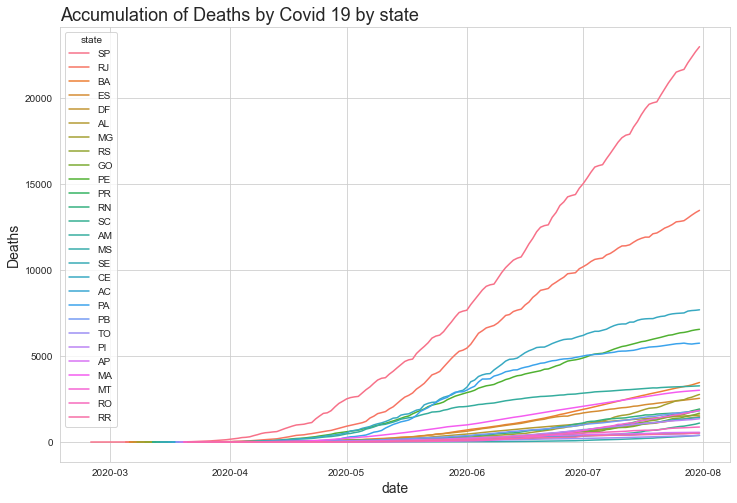

In [7]:
#Plotting the time series to analyse:

#input:
data = covidcases_filtered
title = 'Accumulation of Deaths by Covid 19 by state'
x = covidcases_filtered.date
y = covidcases_filtered.deaths
hue = covidcases_filtered.state
xlabel = 'date'
ylabel = 'Deaths'


#Plotting routine
plottimeseries(title, xlabel, ylabel, x, y, data, hue)

##### Observation: Here we can see that SP is responsable for the highest numbers of deaths in Brazil. For this studied we will foucus in this state.

#### 3.4 Filtering the Data by state of SP

In [8]:
#filtering the inicial data by SP
covidcases_filtered_SP = covidcases_filtered[ covidcases_filtered.state == 'SP']

### 4 Analyzing if the death cases still have a high growth rate
#### We notice that the curves have a exponational profile. Here we would like to do a LOG of it, to understand if the cases of COVID19 still growing or not.

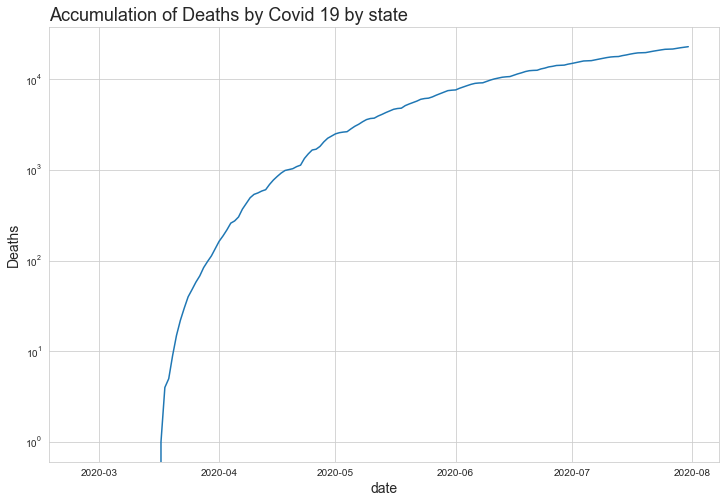

In [9]:
#Plotting the time series to analyse:

#input:
data = covidcases_filtered_SP
title = 'Accumulation of Deaths by Covid 19 by state'
x = covidcases_filtered_SP.date
y = covidcases_filtered_SP.deaths
hue = None
xlabel = 'date'
ylabel = 'Deaths'


#Plotting routine
plottimeserieslog(title, xlabel, ylabel, x, y, data, hue)

##### Observation: here we can see that this state didnt have reach the plateau of the curve yet. That means that the cases still growing 

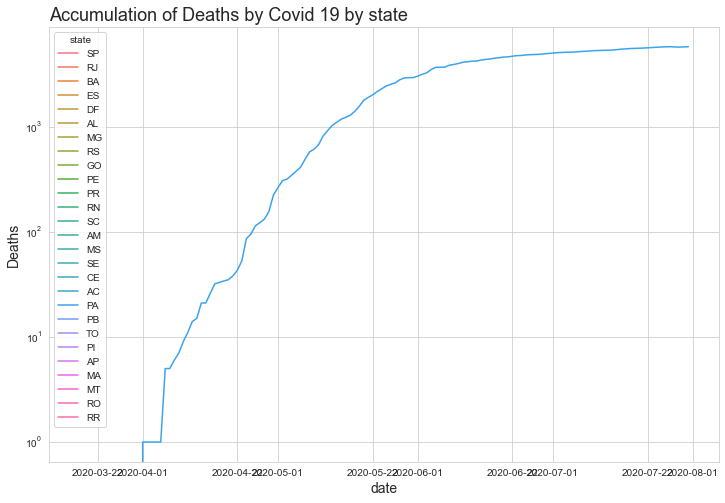

In [10]:
#Plotting the time series to analyse: (Comparing SP and RJ)

#input:
data = covidcases_filtered
title = 'Accumulation of Deaths by Covid 19 by state'
x = covidcases_filtered.date
y = covidcases_filtered[ covidcases_filtered.state == 'PA'].deaths
hue = 'state'
xlabel = 'date'
ylabel = 'Deaths'


#Plotting routine
plottimeserieslog(title, xlabel, ylabel, x, y, data, hue)


##### Observation: here we can see that this state have reach the plateau of the curve already. That means that the cases is reaching a stable number of cases

### 5 - Analysing the suspected and recovered cases

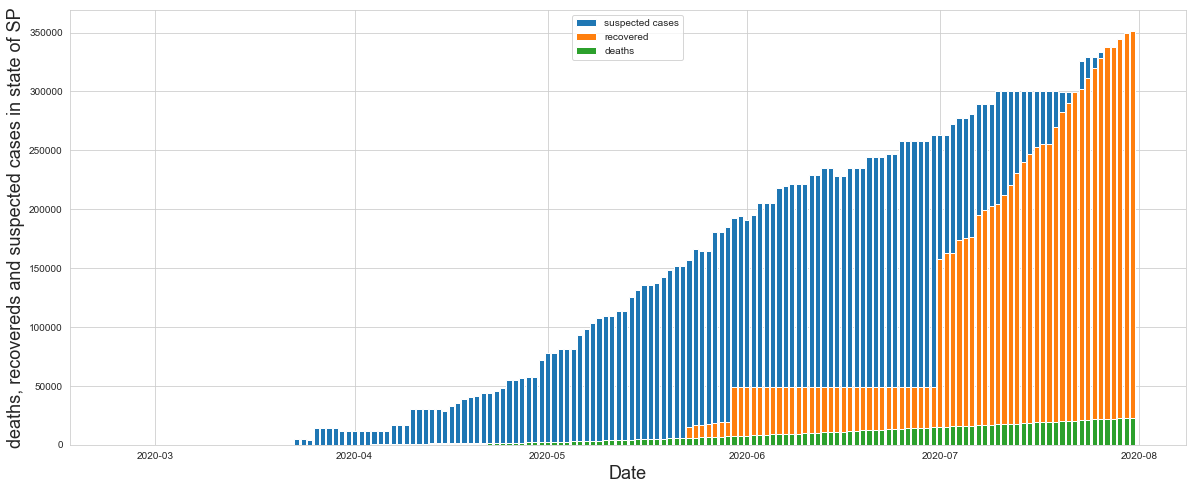

In [11]:
## Here we will explore the date from Suspicous and recovered cases using bar plot

plt.figure(figsize=(20,8))
fig = plt.bar(covidcases_filtered_SP.date , covidcases_filtered_SP['suspected cases'] , label = 'suspected cases')
plt.bar(covidcases_filtered_SP.date , covidcases_filtered_SP['recovered'] , label = 'recovered')
plt.bar(covidcases_filtered_SP.date , covidcases_filtered_SP['deaths'] , label = 'deaths')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('deaths, recovereds and suspected cases in state of SP', fontsize = 18, rotation = 90)
plt.legend()
fig=fig

In [12]:
covidcases_filtered_SP.head()

,weeknumber,date,country,state,city,newdeaths,deaths,newcases,cases,deathsMS,casesMS,deaths_by_100k,cases_by_100k,deaths_by_cases,recovered,suspected cases,tests,tests_by_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


### 6 - New Cases Analysis 

##### 6.1 graphically exploring new cases

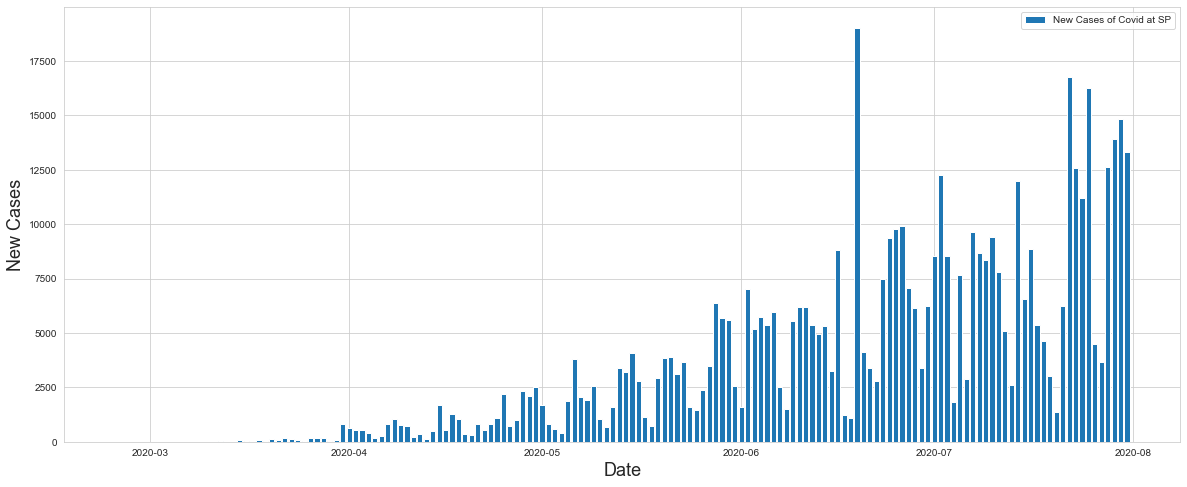

In [13]:
#here we would like to explore the data of new cases
title = 'New Cases of Covid at SP'
xlabel = 'Date'
ylabel = 'New Cases'
x = covidcases_filtered_SP.date
y = covidcases_filtered_SP.newcases


barplot(title, xlabel, ylabel, x, y)

##### 6.2 Exploring the new cases rate and death rates at SP

In [14]:
#creating the new variables: New Cases Rate, and Death Rate 

#new cases rate is a diff of new cases:
covidcases_filtered_SP['new_cases_rate']=covidcases_filtered_SP['newcases'].diff();
covidcases_filtered_SP['death_rate']=covidcases_filtered_SP['deaths'].diff();


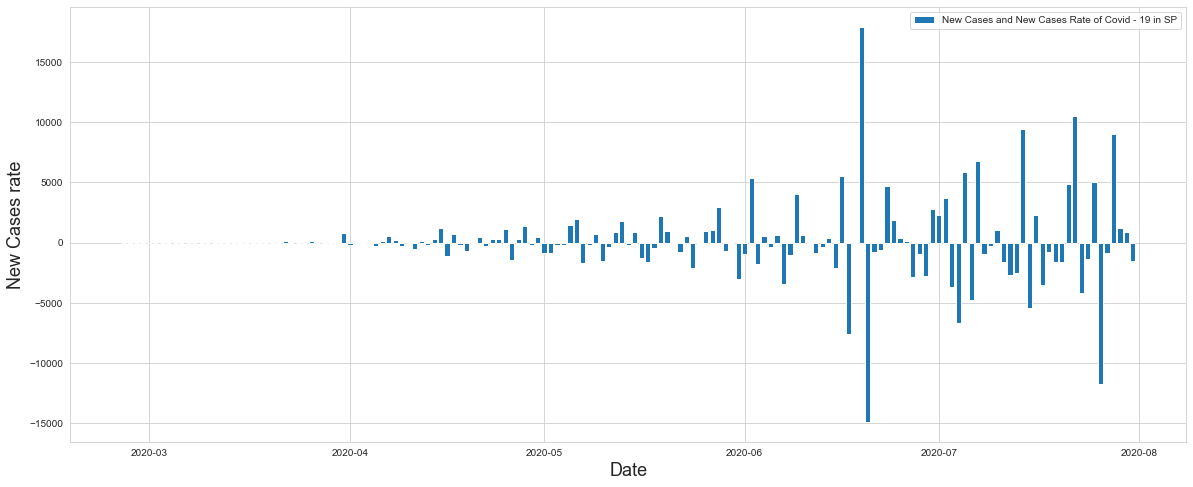

In [15]:
#Exploring graphically the rates:

#here we would like to explore the data of new cases
title = 'New Cases and New Cases Rate of Covid - 19 in SP'
xlabel = 'Date'
ylabel = 'New Cases rate'
x = covidcases_filtered_SP.date
y = covidcases_filtered_SP['new_cases_rate']



barplot(title, xlabel, ylabel, x, y)

##### Obs: Há uma subnotificação durante os fins de semana, o que dá esse comportamento de altas variaç~~oes durante a asemana. para isso seja suavizado, usaremos a técnica de Moving Range

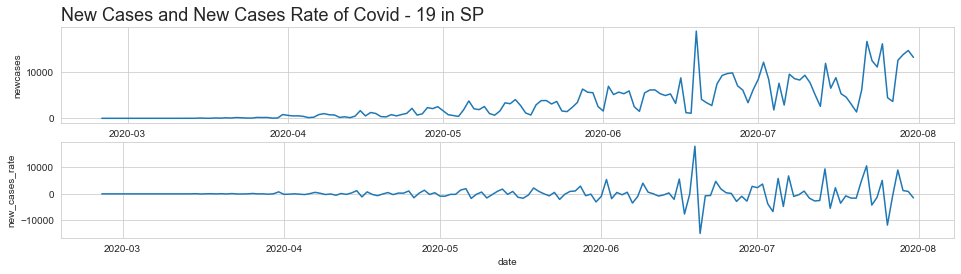

In [16]:
#Exploring graphically the rates:

#inputing date data to be compared:
x =covidcases_filtered_SP.date
y1 = covidcases_filtered_SP['newcases']
y2 = covidcases_filtered_SP['new_cases_rate']
data = covidcases_filtered_SP
title = 'New Cases and New Cases Rate of Covid - 19 in SP'

#Ploting routine:
graphcomp2(x,y1,y2,data,title)

Observações para mais tarde:
67 dias para primeiros 100 mil casos
11 dias - 200 mil casos
4 dias para atingir 300 mil casos

depois de Algumas análises, descobrimos que a secretaria de saude mudou a forma de contabilizar os dados de recuperados a partir da data de julho.
Diminuição da divulgação dos obitos (necessidade de utilizar médias móveis)


### 7 - Exploring the Seasonality and autocorrelation
#### It can be seen from the study that there is a weekly seasonality of rises and falls in the chart. This is caused by the data not being released over the weekend.


In [17]:
#creating the moving average for the deaths. This is a way to correct subnotification during weekends
covidcases_filtered_SP['mean_deaths_7days'] = covidcases_filtered_SP['newdeaths'].rolling(window = 7, center = False,).mean()
covidcases_filtered_SP['mean_deaths_14days'] = covidcases_filtered_SP['newdeaths'].rolling(window = 14, center = False,).mean()

<BarContainer object of 158 artists>

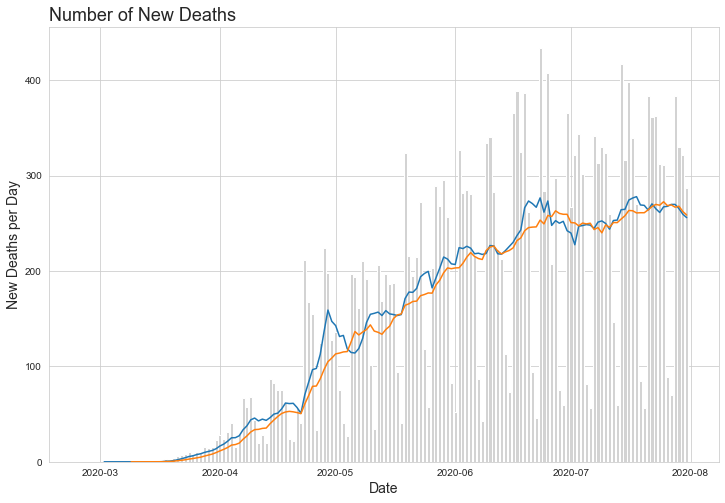

In [18]:
#Comparing it graphically

plottimeseries('Number of New Deaths ', 'Date', 'New Deaths per Day', covidcases_filtered_SP['date'] , covidcases_filtered_SP['mean_deaths_7days'], covidcases_filtered_SP, None)
plottimeseries('Number of New Deaths ', 'Date', 'New Deaths per Day', covidcases_filtered_SP['date'] , covidcases_filtered_SP['mean_deaths_14days'], covidcases_filtered_SP, None)
plt.bar(covidcases_filtered_SP['date'] , covidcases_filtered_SP['newdeaths'] , color = "lightgrey")


### 8 - Autocorrelation analysis 

##### analysis of the interdependence of our variable and time periods.

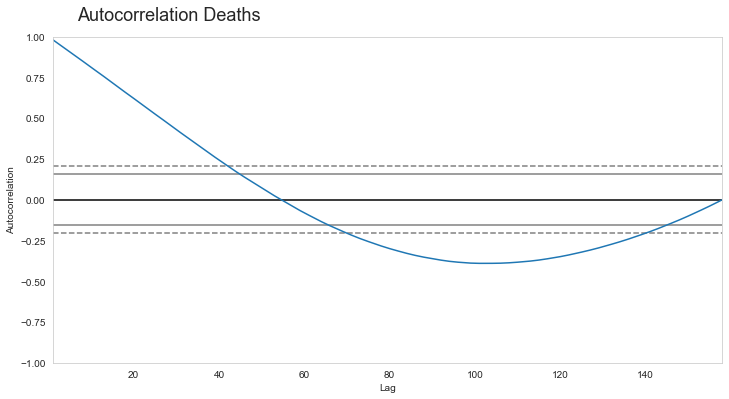

In [19]:
#Importing the Pandas.plotting
from pandas.plotting import autocorrelation_plot

# Inputs________________________
dataset = covidcases_filtered_SP['deaths']
title = 'Autocorrelation Deaths'

# Plotting _____________________
ax = plt.figure(figsize=(12,6))
autocorrelation_plot(dataset)
ax.suptitle(title,fontsize=18, x=0.26, y=0.95) #locking the title on the left
ax=ax

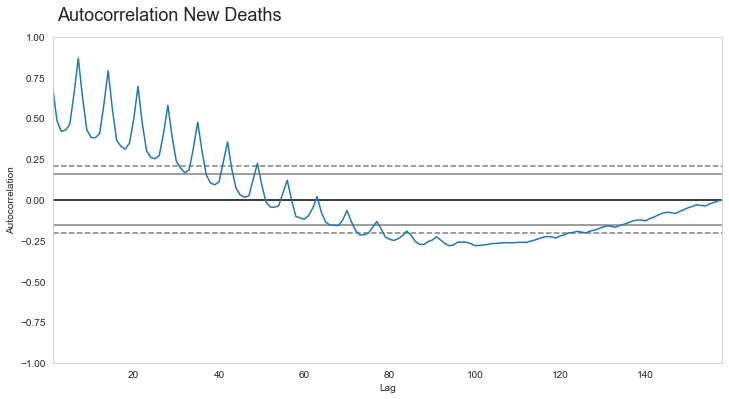

In [20]:
#Importing the Pandas.plotting
from pandas.plotting import autocorrelation_plot

# Inputs________________________
dataset = covidcases_filtered_SP['newdeaths']
title = 'Autocorrelation New Deaths'

# Plotting _____________________
ax = plt.figure(figsize=(12,6))
autocorrelation_plot(dataset)
ax.suptitle(title,fontsize=18, x=0.26, y=0.95) #locking the title on the left
ax=ax

##### Peaks are generated by correlations between 7 days (Generated by underreporting during the weekend)

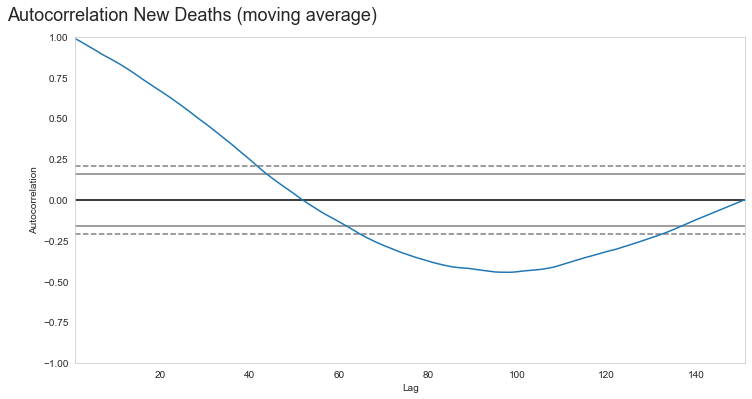

In [21]:
#Importing the Pandas.plotting
from pandas.plotting import autocorrelation_plot

# Inputs________________________
dataset = covidcases_filtered_SP['mean_deaths_7days'][7:]
title = 'Autocorrelation New Deaths (moving average)'

# Plotting _____________________
ax = plt.figure(figsize=(12,6))
autocorrelation_plot(dataset)
ax.suptitle(title,fontsize=18, x=0.26, y=0.95) #locking the title on the left
ax=ax

## 7 - Statistical analysis of sales trends

##### Using Statesmodel to analyse the sazonal, trends and noise 

In [22]:
# Importing important libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [23]:
#Decomposing the data into week seasonally
covidcases_filtered_SP.index = pd.to_datetime(covidcases_filtered_SP.date) #First changing the index, this is not mandatory but will be more clean to see
results_sp = seasonal_decompose(covidcases_filtered_SP['newdeaths'],period=7)

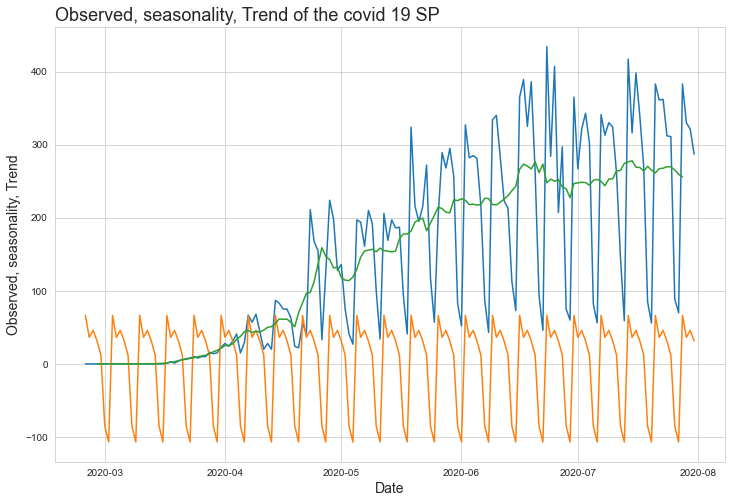

In [24]:
#plotting the results:
plottimeseries('Observed, seasonality, Trend of the covid 19 SP','Date','Observed, seasonality, Trend',covidcases_filtered_SP.date,results_sp.observed,covidcases_filtered_SP,None)
plottimeseries('Observed, seasonality, Trend of the covid 19 SP','Date','Observed, seasonality, Trend',covidcases_filtered_SP.date,results_sp.seasonal,covidcases_filtered_SP,None)
plottimeseries('Observed, seasonality, Trend of the covid 19 SP','Date','Observed, seasonality, Trend',covidcases_filtered_SP.date,results_sp.trend,covidcases_filtered_SP,None)

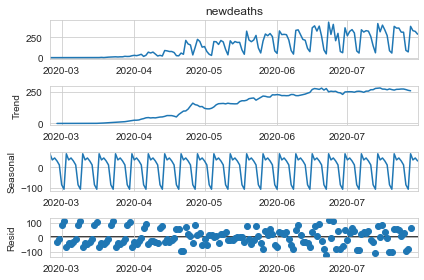

In [25]:
#plotting the results in other way
res = results_sp.plot()


### 8.1 - Comparing the trend in the 3 largest states

##### 8.1.1 - Preparing the Data and decomposing it

In [26]:
#Creating the new DF
covidcases_filtered_SP = covidcases_filtered[ covidcases_filtered.state == 'SP']
covidcases_filtered_MG = covidcases_filtered[ covidcases_filtered.state == 'MG']
covidcases_filtered_RJ = covidcases_filtered[ covidcases_filtered.state == 'RJ']

#Changing the INDEX
covidcases_filtered_SP.index = covidcases_filtered_SP.date
covidcases_filtered_MG.index = covidcases_filtered_MG.date
covidcases_filtered_RJ.index = covidcases_filtered_RJ.date

#Decomposing
results_SP = seasonal_decompose(covidcases_filtered_SP['newdeaths'],period=7)
results_MG = seasonal_decompose(covidcases_filtered_MG['newdeaths'],period=7)
results_RJ = seasonal_decompose(covidcases_filtered_RJ['newdeaths'],period=7)

##### 8.1.2 - PLotting the results

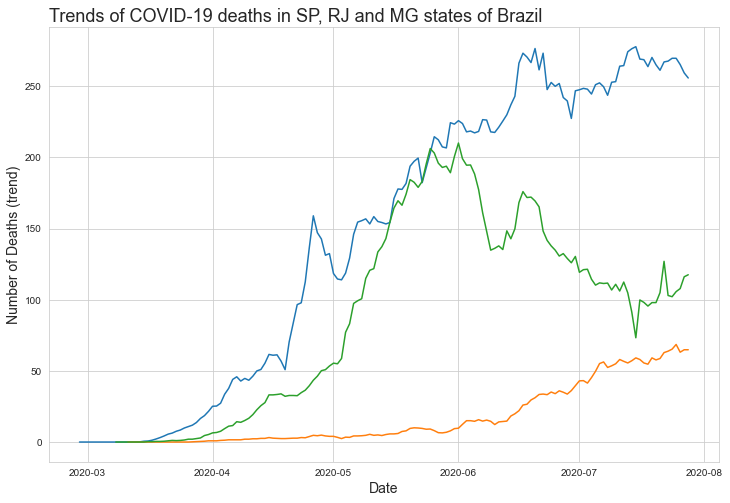

In [27]:
#Comparing the treands:
plottimeseries('Trends of COVID-19 deaths in SP, RJ and MG states of Brazil','Date','Number of Deaths (trend)',covidcases_filtered_SP.date,results_SP.trend,covidcases_filtered_SP,None)
plottimeseries('Trends of COVID-19 deaths in SP, RJ and MG states of Brazil','Date','Number of Deaths (trend)',covidcases_filtered_MG.date,results_MG.trend,covidcases_filtered_MG,None)
plottimeseries('Trends of COVID-19 deaths in SP, RJ and MG states of Brazil','Date','Number of Deaths (trend)',covidcases_filtered_RJ.date,results_RJ.trend,covidcases_filtered_RJ,None)

### 9 - Autocorrelation, and diff and correlation 


##### 1 - Statistically validate whether the series tends to increase or decrease using the fuler analysis
##### 2 - If so, evaluate autocorrelation between our Y, and its derivatives

#### ADF (correlation and tendence analysis)

In [28]:
#___Importing the Libraries:
from statsmodels.tsa.stattools import adfuller

#___Creating the Y variable for analysis

y = covidcases_filtered_SP.cases

#____Analysins the Pvalue

adfullertest = adfuller(y.dropna())
pvalue = adfullertest[1]

### if pvalue > 0,05 this series is not stationary
print(f'pvalue = ', adfullertest[1])
if (pvalue>=0.05):
    print('This serie is not stationary')
else:
    print('This serie is stationary')


pvalue =  0.9969563888815705
This serie is not stationary


#### Understanding the autorocorrelation in Y (plotting the ACF)

In [29]:
#___Importing the Libraries:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Creating a routine to plot the funcion and their diff
def plotacf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title = 'Observed')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title = 'First Y Diff')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title = 'Second Y Diff')

def plotpacf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_pacf(y1, ax=ax1, title = 'Observed')
    ax2 = fig.add_subplot(312)
    fig = plot_pacf(y2, ax=ax2, title = 'First Y Diff')
    ax3 = fig.add_subplot(313)
    fig = plot_pacf(y3, ax=ax3, title = 'Second Y Diff')
 

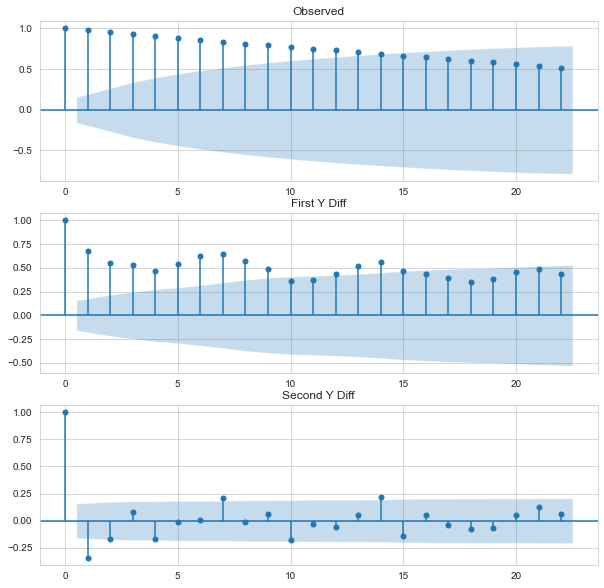

In [30]:
# Plottig the ACF from Y

y1 = covidcases_filtered_SP.cases

#Creating the differences:
y2 = y1.diff().dropna()
y3 = y2.diff().dropna()

#plotting the results

plotacf(y1,y2,y3)

###### Houve uma sobre diferenciação, é vista pelo valor negativo grande após o primero número.

#### Analysing the parcial correlation
##### This is a way to see if we made a suer Diff equation

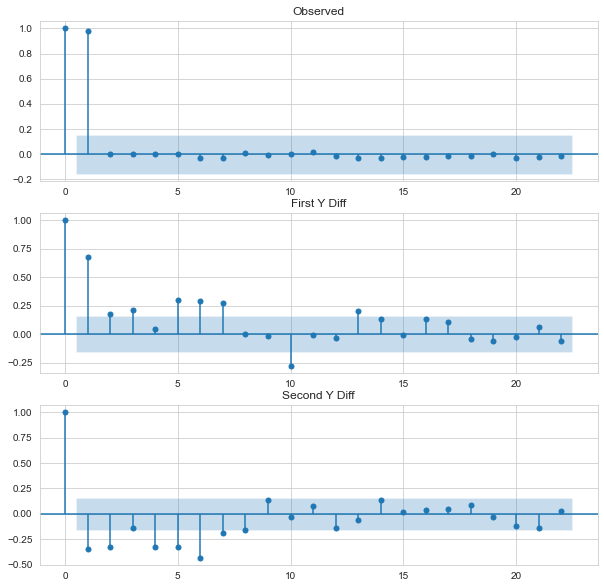

In [31]:
# Plottig the ACF from Y

y1 = covidcases_filtered_SP.cases

#Creating the differences:
y2 = y1.diff().dropna()
y3 = y2.diff().dropna()

#plotting the results

plotpacf(y1,y2,y3)


##### Duas diferenciações foram demais, Azul é o limite de significância

### 10 - ARIMA model (P = 1, D = 1, Q = 1)
#### P: Sazonality (how many t we will put in the model)
#### D: How many times to Diff
#### Q: Resids we will put in the model

In [32]:
#___Importing the Libraries:

from statsmodels.tsa.arima_model import ARIMA

#________________creating the model:
#variable:
y = covidcases_filtered_SP.cases
#P: 
P = 1
#D:
D = 1
#Q:
Q = 1

#creating the ARIMA model:
model = ARIMA(y,order=(P,D,Q))
model_fit = model.fit(disp=0)
print(model_fit.summary())


C:\Users\55119\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\55119\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.919
Method:                       css-mle   S.D. of innovations           2588.989
Date:                Sat, 20 Nov 2021   AIC                           2923.837
Time:                        12:53:15   BIC                           2936.062
Sample:                    02-26-2020   HQIC                          2928.802
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4955.2163   4378.088      1.132      0.258   -3625.678    1.35e+04
ar.L1.D.cases     0.9966      0.005    215.637      0.000       0.988       1.006
ma.L1.D.cases    -0.8462      0.040    -

##### Análisando a resposta do ARIMA:
##### AIC: Critério de informação Akaike (Métrica de distância entre seu modelo e o real, quanto menor  melhor)
##### BIC: Probabilidade do seu modelo ser verdadeiro, quanto menor melhor

## 11 - SARIMA Model 
#### We can see that the sasonality has a huge impact in our model, so we will use the Sazonal Arima. But for this we have to see the best parameter automaticaly, because the number of inputs we have to put in our model

In [94]:
#for this test, we have to create a range of parameters to build the "possibles" models

#importing libraries:
import itertools

#inputing the range for p, d and q:
p = d = q = range(0,2)

#creating a List of possibilities for p,d and q
pdq = list(itertools.product(p, d, q))

#creating a List of possibilities for p,d and q and Sazonallity_frequency

seasonality_frequency = 7

seasonal_pdq = [(x[0], x[1], x[2], seasonality_frequency) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)


In [79]:
#Creating the model:

#importing lib:
import statsmodels.api as sm


#Chosing the Y
y = covidcases_filtered_SP.cases

# Creating a DF to collect the best Resutl
aic_list_df = pd.DataFrame(columns = ['pqd' , 'seasonalpdq','AIC'])

#looping for choosing the best AIC
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        
        #now we want to store the results to see the best one in the end       
        #Data Frame
        actual_aic = pd.DataFrame(data = [(param, param_seasonal, results.aic)], columns=aic_list_df.columns)
       
        #consolidating DF
        aic_list_df = aic_list_df.append(actual_aic,ignore_index=True)

        


In [110]:
#The result DF Was:
aic_list_df.head(5)

#The Best AIC was:
print(f'The Best AIC was:______',aic_list_df.AIC.min())

#The best parameter was:
print('The 3 Best parameter for the best AIC was______________')
aic_list_df.sort_values('AIC', inplace=True,ignore_index=True)
aic_list_df.head(3)

The Best AIC was:______ 2748.291218732968
The 3 Best parameter for the best AIC was______________


,pqd,seasonalpdq,AIC
0,"(1, 1, 1)","(0, 1, 1, 7)",2748.291219
1,"(1, 1, 1)","(1, 1, 1, 7)",2749.786860
2,"(1, 1, 1)","(1, 1, 0, 7)",2768.803123


pdq parameter used:__________pdq =  (1, 1, 1)
seasonal_pdq parameter used:__________p,d,q and seasonal frequecy =  (0, 1, 1, 7)


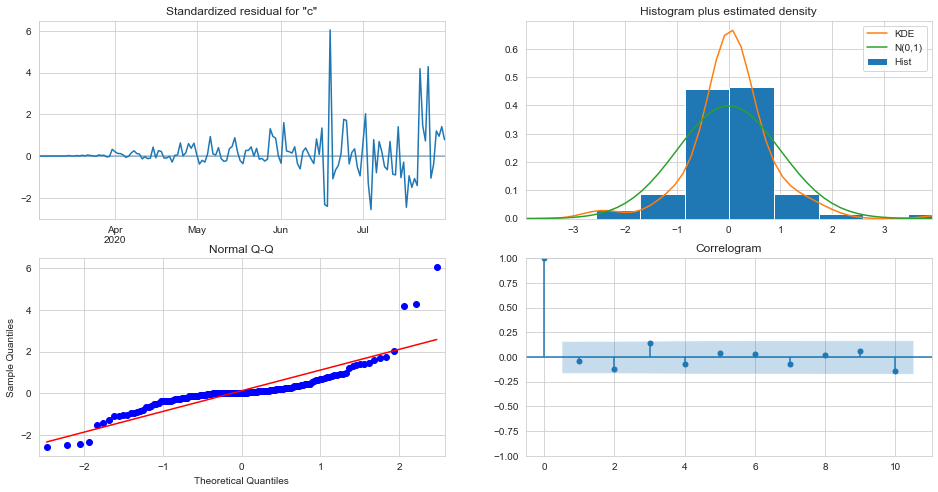

In [122]:
#Fitting the best Model:

mod = sm.tsa.statespace.SARIMAX(y,
                               order = (aic_list_df.pqd[0]), #here we use the 
                               seasonal_order=(aic_list_df.seasonalpdq[0]))
results = mod.fit()

# Parameter used:
print(f'pdq parameter used:__________pdq = ',aic_list_df.pqd[0])
print(f'seasonal_pdq parameter used:__________p,d,q and seasonal frequecy = ',aic_list_df.seasonalpdq[0])



#plottine the results:
results.plot_diagnostics(figsize=(16,8))
plt.show()

### 12 - Predicting using the new Model

In [116]:
#Creating the prediction Interval:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ic = pred.conf_int()
pred_ic.head()

,lower cases,upper cases
2020-07-01,284412.723598,293085.725617
2020-07-02,293359.782873,302032.778001
2020-07-03,309245.414597,317918.403730
2020-07-04,313870.070036,322543.053956
2020-07-05,314104.867310,322777.846694


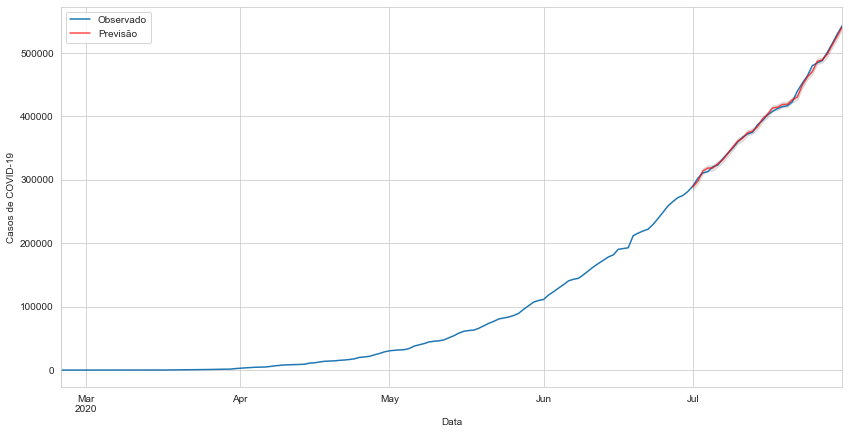

In [118]:
#Seeing how it behaves under a well know circunstance:

ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

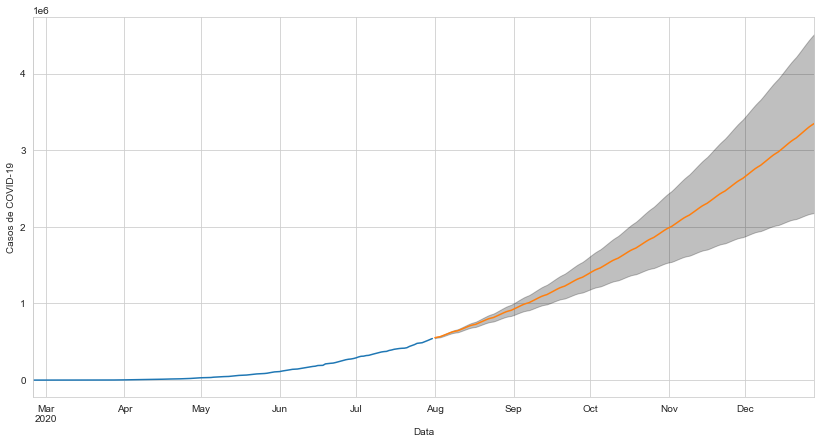

In [119]:
#Predicting:
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()